# Predicting Coffee Grade

## Data Wrangling

## Table of Contents
* [1. Introduction](#introduction)
* [2. Importing libraries](#import)
* [3. Data Loading](#data_loading)
* [4. Data Exploration](#data_exploration)
    * [4.1 Initial Exploration](#initial_exploration)
    * [4.2 Features Description](#features_description)
* [5. Numerical Features Analysis and Cleaning](#numerical_features)
    * [5.1 Deleting 'Unnamed: 0' Column](#deleting_unnamed)
    * [5.2 Cleaning Altitude Column](#cleaning_altitude)
    * [5.3 Cleaning Moisture Column](#cleaning_moisture)
    * [5.4 Checking Quality Measure Columns](#checking_quality)
    * [5.5 Cleaning and Analyzing Category One Defects and Category Two Defects Columns](#cleaning_defects)
    * [5.6 Cleaning and Analyzing Quakers Column](#cleaning_quakers)
    * [5.7 Create Total_Defects and Coffee_Grade Columns](#total_defects)
* [6. Categorical Features Analysis and Cleaning](#cat_features)
    * [6.1 Cleaning Harvest Year Column](#cleaning_harvest)
    * [6.2 Cleaning Processing Method Column](#cleaning_processing)
    * [6.3 Cleaning Color Column](#cleaning_color)
    * [6.4 Cleaning Variety Column](#cleaning_variety)
    * [6.5 Cleaning Country of Origin Column](#cleaning_country)
* [7. Data Organization- creating new, cleaned data frame](#data_organization)
* [8. Saving data](#saving)


<a class="anchor" id="introduction"></a>
## 1. Introduction

Coffee has become such an integral part of contemporary culture that it's hard to imagine a life (or a US workforce) without it. According to the National Coffee Association, coffee related economic activity accounted for 1.6% of the total U.S. GDP in 2015. In the same year, consumers in America spent a whopping $74 billion on coffee. Needless to say, Americans love coffee and are willing to pay for good quality. The good news is that distinguishing 'good quality' coffee is relatively straightforward because of a very standardized way to grade it: The SCA Coffee Beans Classification method. This method judges the relationship between the amount of defective coffee beans and the overall cup quality as evaluated and scored by a panel of judges. The coffee is then assigned a grade based on the results:

#### GRADE 1: SPECIALITY GRADE COFFEE BEANS.
This is the highest grade of beans, and to be classified as Grade 1 Coffee, the beans need to have no primary defects and 0-3 full defects, and zero “Quakers” which are unripe or poorly roasted beans.

#### GRADE 2: PREMIUM GRADE COFFEE BEANS
The second highest grade, and the one you most often would be drinking, these beans are the same as Grade 1 coffee beans, but are allowed a maximum of 3 Quakers and 0-8 defects.

#### GRADE 3: EXCHANGE GRADE COFFEE BEANS
These beans will have 50% above screen 15 and 5% below it, with a maximum of 5 quakers, free from faults, but between 9-23 full defects are permissible. Supermarket brands are using these beans.

#### GRADE 4: STANDARD GRADE COFFEE BEANS
These will have 24 to 86 full defects per 300g. These are getting into dodgy territory.

#### GRADE 5: OFF GRADE COFFEE BEANS
You really don’t want these beans, they have more than 86 full defects per 300g.

Many coffee shops pride themselves on their coffee quality and are willing to share information about their coffee such as the region the coffee is from, the altitude at which it was grown, how it was pre processed, etc. but rarely include the official grade of the coffee. Whether this is because the coffee hasn't been officially graded by the Specialty Coffee Association or it's simply not advertised for some other reason, businesses and consumers could benefit by knowing the quality of coffee they are buying or selling. Better coffee, happier customers, better profits. And for a multibillion dollar a year industry, there are profits to be had. 

Are there factors that make coffee better such as the altitude or region it was grown? Are certain varities or pre processing methods that tend to yeild better results? This project will attempt to answer the question: Can coffee grade be predicted? 

So I went to the Coffee Quality Institute website and downloaded their recent coffee data going back to 2019. This data includes relevant information such as altitude and region the coffee was grown, the cupping scores and number of defects used to assign the coffee a grade, as well as some other information that we may find useful. I decided to limit the data to just the arabica coffee (I excluded robusta) because of limited amount of robusta data. This data was scraped and converted to a csv file called arabica.csv.

The project comprises all steps of Data Science work flow divided as follows:

1. Data wangling
2. Exploratory Data Analysis
3. Feature Engineering & Pre-processing
4. Modeling
5. Documentation


Data Source: https://www.coffeeinstitute.org/

Other Sources: 
1. https://coffeebeansdelivered.com.au/blog/coffee-beans-graded/ 
2. https://www.ncausa.org/Industry-Resources/Economic-Impact

<a class="anchor" id="import"></a>

## 2. Importing Libraries

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<a class="anchor" id="data_loading"></a>

## 3. Data Loading

In [9]:
#create pandas df called 'coffee'
coffee = pd.read_csv('./data/arabica.csv')

<a class="anchor" id="data_exploration"></a>

## 4. Data Exploration

<a class="anchor" id="initial_exploration"></a>

### 4.1 Initial Exploration

Let's get a feel for our data by checking out the info, the first few rows of the data frame, and the column names

In [10]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             150 non-null    int64  
 1   Country of Origin      150 non-null    object 
 2   Farm Name              142 non-null    object 
 3   Lot Number             150 non-null    object 
 4   Mill                   134 non-null    object 
 5   ICO Number             111 non-null    object 
 6   Company                150 non-null    object 
 7   Altitude               150 non-null    object 
 8   Region                 149 non-null    object 
 9   Producer               149 non-null    object 
 10  Number of Bags         150 non-null    int64  
 11  Bag Weight             150 non-null    object 
 12  In-Country Partner     150 non-null    object 
 13  Harvest Year           150 non-null    object 
 14  Grading Date           150 non-null    object 
 15  Owner 

I can see that this is a pretty small dataset (only about 150 rows of data) but there aren't a ton of missing data which is good. I can also see that there are some features that should be floats or integers that are currently object dtypes such as Harvest Year and Altitude.

In [11]:
#check out the first 5 rows of the data frame
coffee.head()

,Unnamed: 0,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,...,Moisture,Category One Defects,Quakers,Color,Category Two Defects,NA,Expiration,Certification Body,Certification Address,Certification Contact
0,0,Taiwan,嵩岳咖啡莊園,202004,嵩岳咖啡莊園,NaN,TCL 台灣咖啡研究室,1200,雲林-石壁,郭亮志,...,11 %,0 full defects,0,None,0 full defects,NaN,"September 1st, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296
1,0,Kenya,NaN,1542247,Tylor Winch,037-1673-5107,Nestle Nespresso SA,1650,NaN,Tylor Winch Volcafe,...,11 %,0 full defects,0,Green,1 full defects,NaN,"October 30th, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296
2,0,Colombia,Droptop partner,Droptop Specialty Coffee Blend,NaN,NaN,Cafe Droptop,1800,colombia,Droptop partner,...,11 %,0 full defects,0,Green,0 full defects,NaN,"May 26th, 2022",Specialty Coffee Institute of Asia,"148 ULGIRO, #1309,",Sung-Yong Steven Kil - 82-10-7912-1456-English...
3,0,Ethiopia,Honey Drip,1,non,NaN,宸嶧國際有限公司,2219,Ethiopia,Honey Dip,...,11 %,0 full defects,3,Green,4 full defects,NaN,"July 14th, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,0,Colombia,Granja el Sauce,001 Tostado SW,Dry Mill/ Honey Process,NaN,Tostado SW Limited,1650,Santander Colombia,Alvaro Edgar Ramirez Jauregui,...,11 %,0 full defects,0,None,0 full defects,NaN,"September 4th, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296


In [12]:
#Let's take a look at the column names
coffee.columns

Index(['Unnamed: 0', 'Country of Origin', 'Farm Name', 'Lot Number', 'Mill',
       'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture', 'Category One Defects', 'Quakers',
       'Color', 'Category Two Defects', 'NA', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

<a class="anchor" id="features_description"></a>

### 4.2 Features description 

#### Quality Measures
1. Aroma- The aromatic aspects include Fragrance (defined as the smell of the ground coffee when still dry) and Aroma (the smell of the coffee when infused with hot water). One can evaluate this at three distinct steps in the cupping process: (1) sniffing the grounds placed into the cup before pouring water onto the coffee; (2) sniffing the aromas released while breaking the crust; and (3) sniffing the aromas released as the coffee steeps. Specific aromas can be noted under "qualities" and the intensity of the dry, break, and wet aroma aspects noted on the 5-point vertical scales. The score finally given should reflect the preference of all three aspects of a sample's Fragrance/Aroma.
2. Flavor- Flavor represents the coffee's principal character, the "mid-range" notes, in between the first impressions given by the coffee's first aroma and acidity to its final aftertaste. It is a combined impression of all the gustatory (taste bud) sensations and retro-nasal aromas that go from the mouth to nose. The score given for Flavor should account for the intensity, quality and complexity of its combined taste and aroma, experienced when the coffee is slurped into the mouth vigorously so as to involve the entire palate in the evaluation.
3. Aftertaste- Aftertaste is defined as the length of positive flavor (taste and aroma) qualities emanating from the back of the palate and remaining after the coffee is expectorated or swallowed. If the aftertaste were short or unpleasant, a lower score would be given.
4. Acidity- Acidity is often described as "brightness" when favorable or "sour" when unfavorable. At its best, acidity contributes to a coffee's liveliness, sweetness, and fresh- fruit character and is almost immediately experienced and evaluated when the coffee is first slurped into the mouth. Acidity that is overly intense or dominating may be unpleasant, however, and excessive acidity may not be appropriate to the flavor profile of the sample. The final score marked on the horizontal tick-mark scale should reflect the panelist's perceived quality for the Acidity relative to the expected flavor profile based on origin characteristics and/or other factors (degree of roast, intended use, etc.). Coffees expected to be high in Acidity, such as a Kenya coffee, or coffees expected to be low in Acidity, such as a Sumatra coffee, can receive equally high preference scores although their intensity rankings will be quite different.
5. Body- The quality of Body is based upon the tactile feeling of the liquid in the mouth, especially as perceived between the tongue and roof of the mouth. Most samples with heavy Body may also receive a high score in terms of quality due to the presence of brew colloids and sucrose. Some samples with lighter Body may also have a pleasant feeling in the mouth, however. Coffees expected to be high in Body, such as a Sumatra coffee, or coffees expected to be low in Body, such as a Mexican coffee, can receive equally high preference scores although their intensity rankings will be quite different.
6. Balance- How all the various aspects of Flavor, Aftertaste, Acidity and Body of the sample work together and complement or contrast to each other is Balance. If the sample is lacking in certain aroma or taste attributes or if some attributes are overpowering, the Balance score would be reduced.
7. Uniformity- Uniformity refers to consistency of flavor of the different cups of the sample tasted. If the cups taste different, the rating of this aspect would not be as high. 2 points are awarded for each cup displaying this attribute, with a maximum of 10 points if all 5 cups are the same.
8. Cup Cleanliness- Clean Cup refers to a lack of interfering negative impressions from first ingestion to final aftertaste, a "transparency" of cup. In evaluating this attribute, notice the total flavor experience from the time of the initial ingestion to final swallowing or expectoration. Any non-coffee like tastes or aromas will disqualify an individual cup. 2 points are awarded for each cup displaying the attribute of Clean Cup.
9. Sweetness- Sweetness refers to a pleasing fullness of flavor as well as any obvious sweetness and its perception is the result of the presence of certain carbohydrates. The opposite of sweetness in this context is sour, astringency or "green" flavors. This quality may not be directly perceived as in sucrose-laden products such as soft drinks, but will affect other flavor attributes. 2 points are awarded for each cup displaying this attribute for a maximum score of 10 points.
10. Overall- The "overall" scoring aspect is meant to reflect the holistically integrated rating of the sample as perceived by the individual panelist. A sample with many highly pleasant aspects, but not quite "measuring up" would receive a lower rating. A coffee that met expectations as to its character and reflected particular origin flavor qualities would receive a high score. An exemplary example of preferred characteristics not fully reflected in the individual score of the individual attributes might receive an even higher score. This is the step where the panelists make their personal appraisal.
11. Moisture
12. Defects
#### Bean Metadata
13. Processing Method
14. Color
15. Species (arabica or robusta)
#### Farm Metadata
16. Owner
17. Country of Origin
18. Farm Name
19. Lot Number
20. Mill
21. Company
22. Altitude- meters
23. Region
#### Other
24. Quakers- number of unripe or poorly roasted beans

<a class="anchor" id="numerical_features"></a>

## 5. Numerical Features Analysis and Cleaning

<a class="anchor" id="deleting_unnamed"></a>

### 5.1 Deleting 'Unnamed: 0' Column

My first column that I want to check out is titled 'Unnamed: 0'

In [13]:
coffee['Unnamed: 0'].unique()

array([0])

Because this is a column that just has a zero in every row, I'm going to go ahead and delete it altogether.

In [14]:
#drop the 'Unnamed: 0' column
coffee = coffee.drop(columns=['Unnamed: 0'])

<a class="anchor" id="cleaning_altitude"></a>

### 5.2 Cleaning Altitude Column

This column is currently of the dtype: object and I want it to be numerical. Let's start by checking out what kind of values we have in this column.

In [15]:
coffee.Altitude.unique()

array(['1200', '1650', '1800', '2219', '15002100', '2100', '2200', '2000',
       '1950', '1276', '1300', '2229', '1040', '1994', '1420', '1700',
       '5650', '1100', '1400+', '1450', '1600', '1750', '442', '1150',
       '1666', '1300-1800', '1200-1500', '1500', '1943', '1400', '1000',
       '1020', '1250', '1901.64', '1850', '1200-1900', '-900', '1574',
       '1350', '1200-1300'], dtype=object)

It looks like we have some columns with ranges denoted with dashes (-) as well as a plus sign. To deal with the ranges and rogue + or - signs, we can turn each row into an individual series containing the number elements of the Altitude columns. We can then find the mean of the series and create a new column called "Mean Altitude (m)"

In [16]:
#Turn all the number elements in the Altitude column into individual series

b = coffee['Altitude'].str.findall('(\d+)')
print(b)

0            [1200]
1            [1650]
2            [1800]
3            [2219]
4            [1650]
           ...     
145    [1200, 1300]
146    [1300, 1800]
147          [1200]
148          [1150]
149          [1150]
Name: Altitude, Length: 150, dtype: object


In [17]:
#find the means of each series
mean_altitude = pd.Series([],dtype = 'float64')
for i in range(0,len(b)):
    b[i] = np.array(b[i]).astype(np.float)
    mean_altitude[i] = sum(b[i]) / len(b[i])

In [18]:
#create new dataframe containing the mean altitude
altitude_df = mean_altitude.to_frame()

In [19]:
#title the column
altitude_df.columns = ['Mean Altitude (m)']

Let's check out our new Mean Altitude column. Right now it is its own data frame but we will join it to our coffee df as its own column later.

In [20]:
altitude_df

,Mean Altitude (m)
0,1200.0
1,1650.0
2,1800.0
3,2219.0
4,1650.0
...,...
145,1250.0
146,1550.0
147,1200.0
148,1150.0


Let's check out the histogram

(array([149.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([4.42000000e+02, 7.50524900e+05, 1.50060780e+06, 2.25069070e+06,
        3.00077360e+06, 3.75085650e+06, 4.50093940e+06, 5.25102230e+06,
        6.00110520e+06, 6.75118810e+06, 7.50127100e+06, 8.25135390e+06,
        9.00143680e+06, 9.75151970e+06, 1.05016026e+07, 1.12516855e+07,
        1.20017684e+07, 1.27518513e+07, 1.35019342e+07, 1.42520171e+07,
        1.50021000e+07]),
 <BarContainer object of 20 artists>)

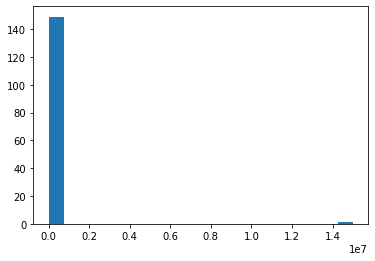

In [21]:
plt.hist(altitude_df['Mean Altitude (m)'], bins=20)

Based on this graph, it seems that we have an outlier. Let's see if we can diagnose the issue.

In [22]:
altitude_df[altitude_df['Mean Altitude (m)']>2000]

,Mean Altitude (m)
3,2219.0
5,15002100.0
7,2100.0
8,2100.0
9,2200.0
14,2229.0
22,5650.0


It seems that our row 5 has an altitude of 15,002,100 m. Unless we've started growing coffee beans in space, this is an incorrect value. My hypothesis is that this is an input error and is supposed to be the range from 1500-2100m. Let's see where these beans were grown.

In [23]:
coffee.loc[5]

Country of Origin                                                 Ethiopia
Farm Name                                                      Kata Muduga
Lot Number                                                               1
Mill                                                   Kata Muduga Farmers
ICO Number                                                             NaN
Company                                                          Haia GmbH
Altitude                                                          15002100
Region                                                                Limu
Producer                                         Kata Muduga Farmers Union
Number of Bags                                                         100
Bag Weight                                                           60 kg
In-Country Partner       NKG Quality Service (a division of Bernhard Ro...
Harvest Year                                                          2020
Grading Date             

After doing some research, I found that this farm is located in Oromia, Ethiopia which has an altitude of 1500-2300 meters. This checks out with our hypothesis. I will go head and assign the mean altitude to this data value

In [24]:
#assign the altitude to be the mean of 1500 and 2100m
altitude_df.loc[5] = (1500+2100)/2
altitude_df.loc[5]

Mean Altitude (m)    1800.0
Name: 5, dtype: float64

Let's look at the histogram again

(array([ 3.,  2., 37., 27., 46., 29.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 442. ,  702.4,  962.8, 1223.2, 1483.6, 1744. , 2004.4, 2264.8,
        2525.2, 2785.6, 3046. , 3306.4, 3566.8, 3827.2, 4087.6, 4348. ,
        4608.4, 4868.8, 5129.2, 5389.6, 5650. ]),
 <BarContainer object of 20 artists>)

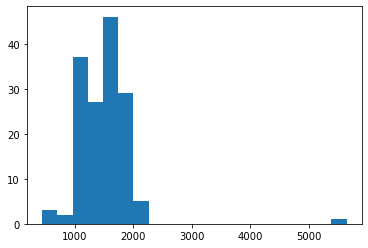

In [25]:
plt.hist(altitude_df['Mean Altitude (m)'], bins=20)

In [26]:
altitude_df[altitude_df['Mean Altitude (m)']>4000]

,Mean Altitude (m)
22,5650.0


It seems like row 22 with an altitude of 5650m is our outlier. Let's look into this data point.

In [27]:
coffee.loc[22]

Country of Origin                                                Guatemala
Farm Name                                                 SAN RAFAEL URIAS
Lot Number                                                     11/54876/01
Mill                                                   SU BENEFICIO, S. A.
ICO Number                                                     11/54876/01
Company                                                     VALBROS, S. A.
Altitude                                                              5650
Region                                                   ANTIGUA GUATEMALA
Producer                                                    VALDROS, S. A.
Number of Bags                                                          50
Bag Weight                                                           69 kg
In-Country Partner                            Asociacion Nacional Del Café
Harvest Year                                                          2021
Grading Date             

Because the max elevation in Guatemala is 4,203 meters, this altitude must be incorrect. After doing some research, I discovered that the altitude of Antigua, Guatemala is 5,029 feet (1,533 metres), so this is likely an altitude in feet rather than meters. I will convert this altitude to feet and use the conversion. 

In [28]:
#convert altitude of the outlier from feet to meters
altitude_df.loc[22] = altitude_df.loc[22]*0.3048

In [29]:
altitude_df.loc[22]

Mean Altitude (m)    1722.12
Name: 22, dtype: float64

The Altitude values look pretty good now. Let's plot our histogram one last time.

In [30]:
altitude_df['Mean Altitude (m)'].sort_values()

38      442.0
41      442.0
31      442.0
85      900.0
135     900.0
        ...  
7      2100.0
8      2100.0
9      2200.0
3      2219.0
14     2229.0
Name: Mean Altitude (m), Length: 150, dtype: float64

(array([ 3.,  0.,  0.,  2.,  8., 18., 15.,  9., 22., 21., 22., 20.,  3.,
         4.,  3.]),
 array([ 442.        ,  561.13333333,  680.26666667,  799.4       ,
         918.53333333, 1037.66666667, 1156.8       , 1275.93333333,
        1395.06666667, 1514.2       , 1633.33333333, 1752.46666667,
        1871.6       , 1990.73333333, 2109.86666667, 2229.        ]),
 <BarContainer object of 15 artists>)

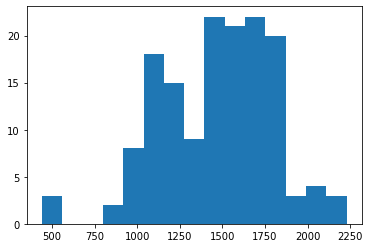

In [31]:
plt.hist(altitude_df['Mean Altitude (m)'], bins=15)

This looks like a reasonable range of altitude values and even looks slightly normal. We can go ahead and create a new column in our coffee dataframe.

In [32]:
#create Mean Altitude column
coffee['Mean Altitude (m)'] = altitude_df['Mean Altitude (m)']

<a class="anchor" id="cleaning_moisture"></a>

### 5.3 Cleaning Moisture Column

In [33]:
coffee['Moisture'].unique()

array(['11 %', '11.5 %', '12 %', '10 %', '10.5 %', '8.6 %', '13.3 %',
       '13.5 %', '9.7 %', '10.9 %', '0 %', '11.8 %', '10.6 %', '10.4 %',
       '11.6 %', '10.3 %', '9.9 %', '11.9 %', '10.8 %', '12.3 %',
       '11.3 %'], dtype=object)

In [34]:
#delete all percent signs
coffee['Moisture'] = coffee['Moisture'].str.replace(' %', '')

In [35]:
#convert 'Moisture' values from strings to floats
coffee["Moisture"] = pd.to_numeric(coffee["Moisture"])

In [36]:
#check values and data type of updated Moisture column
print(coffee['Moisture'].unique())
print(coffee['Moisture'].dtypes)

[11.  11.5 12.  10.  10.5  8.6 13.3 13.5  9.7 10.9  0.  11.8 10.6 10.4
 11.6 10.3  9.9 11.9 10.8 12.3 11.3]
float64


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1., 51., 93.,  4.]),
 array([ 0.  ,  1.35,  2.7 ,  4.05,  5.4 ,  6.75,  8.1 ,  9.45, 10.8 ,
        12.15, 13.5 ]),
 <BarContainer object of 10 artists>)

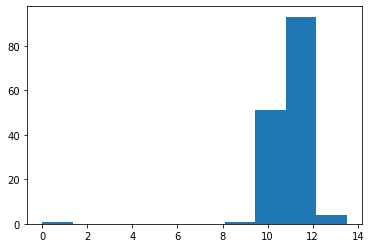

In [37]:
plt.hist(coffee['Moisture'], bins=10)

<a class="anchor" id="checking_quality"></a>

### 5.4 Checking Quality Measure Columns

Judging criteria scores should range from 0-10, other than Total Cup Points which should range from 0-100. Though we will end up not using the columns for our model, I'm interested to see if there are any input errors.

In [38]:
quality_measures = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points']

In [39]:
#check to see if values in these columns fall in the correct ranges and if there's any missing data:
for i in quality_measures:
    print(i, 'max =' , coffee[i].max())
    print(i, 'min =' , coffee[i].min())
    print(i, 'NaN count =' , coffee[i].isna().sum())

Aroma max = 8.58
Aroma min = 7.5
Aroma NaN count = 0
Flavor max = 8.67
Flavor min = 7.42
Flavor NaN count = 0
Aftertaste max = 8.25
Aftertaste min = 7.0
Aftertaste NaN count = 0
Acidity max = 8.67
Acidity min = 7.25
Acidity NaN count = 0
Body max = 8.5
Body min = 7.25
Body NaN count = 0
Balance max = 8.58
Balance min = 7.33
Balance NaN count = 0
Uniformity max = 10.0
Uniformity min = 9.33
Uniformity NaN count = 0
Clean Cup max = 10.0
Clean Cup min = 10.0
Clean Cup NaN count = 0
Sweetness max = 10.0
Sweetness min = 10.0
Sweetness NaN count = 0
Overall max = 8.83
Overall min = 7.42
Overall NaN count = 0
Defects max = 0.0
Defects min = 0.0
Defects NaN count = 0
Total Cup Points max = 89.25
Total Cup Points min = 82.25
Total Cup Points NaN count = 0


All of the values are present and reasonable (numbers between 0-10 for the judging critera). I also notice that all values have a clean cup score of 10 and a defects score of 0.

<a class="anchor" id="cleaning_defects"></a>

### 5.5 Cleaning and Analyzing Category One Defects and Category Two Defects Columns

Let's check out our unique values for Cat One and Cat Two defects. These defects, along with the Quakers feature, will contribute to the Coffee Grade which we will create and which will be our classes for our classification model. We will need to turn these columns into integers so we can perform operations on them.

In [40]:
coffee['Category One Defects'].unique()

array(['0 full defects', '1 full defects'], dtype=object)

In [41]:
coffee['Category Two Defects'].unique()

array(['0 full defects', '1 full defects', '4 full defects',
       '3 full defects', '5 full defects', '7 full defects',
       '2 full defects', '6 full defects', '9 full defects',
       '8 full defects', '16 full defects'], dtype=object)

Every single row contains the term 'full defects' in the Cat One and Cat Two defects columns so I can just delete that phrase from all entries and covert the dtype into an int64

In [42]:
coffee['Category One Defects'] = coffee['Category One Defects'].str.replace('full defects', '')
coffee['Category Two Defects'] = coffee['Category Two Defects'].str.replace('full defects', '')

In [43]:
#check updated Cat One and Cat Two Defects values:

print('Cat One Defects Values:', coffee['Category One Defects'].unique())
print('Cat Two Defects Values:', coffee['Category Two Defects'].unique())

Cat One Defects Values: ['0 ' '1 ']
Cat Two Defects Values: ['0 ' '1 ' '4 ' '3 ' '5 ' '7 ' '2 ' '6 ' '9 ' '8 ' '16 ']


In [44]:
#convert both columns (object) into numeric (int64) types

coffee["Category One Defects"] = pd.to_numeric(coffee["Category One Defects"])
coffee["Category Two Defects"] = pd.to_numeric(coffee["Category Two Defects"])

In [45]:
#check updated Cat One and Cat Two Data Types

print('Cat One Data Type:' , coffee['Category One Defects'].dtypes)
print('Cat Two Data Type:' , coffee['Category Two Defects'].dtypes)

Cat One Data Type: int64
Cat Two Data Type: int64


Now that we have these columns cleaned, lets explore them a little further. I'm interested to see how many of the coffees have these defects.

In [46]:
coffee["Category One Defects"].value_counts()

0    148
1      2
Name: Category One Defects, dtype: int64

Pretty much all of our data has no Cat One defects.

In [47]:
coffee["Category Two Defects"].value_counts()

0     33
4     22
2     21
5     19
1     18
3     12
7      9
9      6
6      6
16     2
8      2
Name: Category Two Defects, dtype: int64

Cat Two defects seem to be a lot more common, though it looks like a large majority of the coffee has 5 or less Cat Two defects.

(array([51., 33., 22., 25.,  9.,  8.,  0.,  0.,  0.,  2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

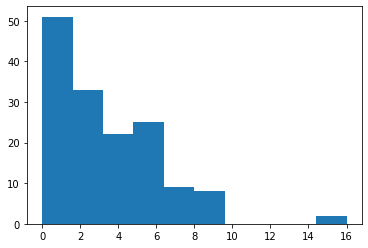

In [48]:
plt.hist(coffee['Category Two Defects'], bins=10)

<a class="anchor" id="cleaning_quakers"></a>

### 5.6 Cleaning and Analyzing Quakers Column

In [49]:
coffee['Quakers'].unique()

array([ 0,  3,  1,  6,  4,  2, 11])

In [50]:
coffee['Quakers'].dtypes

dtype('int64')

(array([118.,  21.,   4.,   3.,   0.,   2.,   0.,   0.,   0.,   2.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

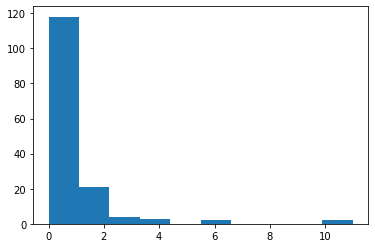

In [51]:
plt.hist(coffee['Quakers'])

The Quakers column looks clean. It seems like most coffees have under 3 with some reaching as high as 11.

<a class="anchor" id="total_defects"></a>

### 5.7 Create Total_Defects and Coffee_Grade Columns

Because we will be trying to predict the coffee grade which is based on number of defects and quakers, we will create a total defects column:


In [52]:
#create Total Defects column by adding Cat One and Cat Two defefects
coffee['Total_Defects'] = coffee["Category One Defects"].astype(int).values + coffee["Category Two Defects"].astype(int).values

In [53]:
coffee['Total_Defects'].unique()

array([ 0,  1,  4,  3,  5,  7,  2,  6,  9,  8, 16])

In [54]:
#check value counts
coffee['Total_Defects'].value_counts()

0     33
5     21
2     21
4     20
1     18
3     12
7      9
9      6
6      6
16     2
8      2
Name: Total_Defects, dtype: int64

We can see here that most coffees had less than 6 total defects, though there are some with higher amounts. The highest amount of defects is 16 so we can limit our coffee grades of this dataset to be either Grade 1: Specialty, Grade 2: Premium, Grade 3: Exchange, and Grade 4: Standard. We can now create our Coffee Grade column based on the criteria of how coffees are graded.

#### GRADE 1: SPECIALITY GRADE COFFEE BEANS.
This is the highest grade of beans, and to be classified as Grade 1 Coffee, the beans need to have no primary defects and 0-3 full defects, and zero “Quakers” which are unripe or poorly roasted beans.

#### GRADE 2: PREMIUM GRADE COFFEE BEANS
The second highest grade, and the one you most often would be drinking, these beans are the same as Grade 1 coffee beans, but are allowed a maximum of 3 Quakers and 0-8 defects.

#### GRADE 3: EXCHANGE GRADE COFFEE BEANS
These beans will have 50% above screen 15 and 5% below it, with a maximum of 5 quakers, free from faults, but between 9-23 full defects are permissible. Supermarket brands are using these beans.

#### GRADE 4: STANDARD GRADE COFFEE BEANS
These will have 24 to 86 full defects per 300g. These are getting into dodgy territory.

#### GRADE 5: OFF GRADE COFFEE BEANS
You really don’t want these beans, they have more than 86 full defects per 300g.

In [55]:
#create Coffee_Grade column based on the grading criteria for coffee grades: https://coffeebeansdelivered.com.au/blog/coffee-beans-graded/
def CoffeeGrade(df):

    if (df['Total_Defects'] <= 3) and (df['Quakers'] == 0):
        return 'Specialty'
    elif (df['Total_Defects'] <= 8) and (1 <= df['Quakers'] <=3):
        return 'Premium'
    elif(4 <= df['Total_Defects'] <=8) and (df['Quakers'] <= 3):
        return 'Premium'
    elif(1 <= df['Total_Defects'] <=8) and (df['Quakers'] <= 5):
        return 'Exchange'
    elif (9 <= df['Total_Defects'] <= 23) and (df['Quakers'] <= 5):
        return 'Exchange'
    elif (df['Total_Defects'] >= 23) or (df['Quakers'] >= 5):
        return 'Standard Grade'
    else:
        return 'Not Graded'

#check out updated df
coffee['Coffee_Grade'] = coffee.apply(CoffeeGrade, axis = 1)
coffee.head()

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Color,Category Two Defects,NA,Expiration,Certification Body,Certification Address,Certification Contact,Mean Altitude (m),Total_Defects,Coffee_Grade
0,Taiwan,嵩岳咖啡莊園,202004,嵩岳咖啡莊園,NaN,TCL 台灣咖啡研究室,1200,雲林-石壁,郭亮志,3,...,None,0,NaN,"September 1st, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296,1200.0,0,Specialty
1,Kenya,NaN,1542247,Tylor Winch,037-1673-5107,Nestle Nespresso SA,1650,NaN,Tylor Winch Volcafe,320,...,Green,1,NaN,"October 30th, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296,1650.0,1,Specialty
2,Colombia,Droptop partner,Droptop Specialty Coffee Blend,NaN,NaN,Cafe Droptop,1800,colombia,Droptop partner,159,...,Green,0,NaN,"May 26th, 2022",Specialty Coffee Institute of Asia,"148 ULGIRO, #1309,",Sung-Yong Steven Kil - 82-10-7912-1456-English...,1800.0,0,Specialty
3,Ethiopia,Honey Drip,1,non,NaN,宸嶧國際有限公司,2219,Ethiopia,Honey Dip,37,...,Green,4,NaN,"July 14th, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,2219.0,4,Premium
4,Colombia,Granja el Sauce,001 Tostado SW,Dry Mill/ Honey Process,NaN,Tostado SW Limited,1650,Santander Colombia,Alvaro Edgar Ramirez Jauregui,1,...,None,0,NaN,"September 4th, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296,1650.0,0,Specialty


In [56]:
#check out value counts for our Coffee Grades
coffee.Coffee_Grade.value_counts()

Premium           79
Specialty         58
Exchange           9
Standard Grade     4
Name: Coffee_Grade, dtype: int64

In [57]:
#calculate percentages
coffee['Coffee_Grade'].value_counts(normalize=True) * 100

Premium           52.666667
Specialty         38.666667
Exchange           6.000000
Standard Grade     2.666667
Name: Coffee_Grade, dtype: float64

It looks like the vast majority (over 90%) of our data are either Premium or Specialty Grade. This is an extremely unbalanced data set and we will need to account for this when training/testing our models.

<a class="anchor" id="cat_features"></a>

## 6. Categorical Features Analyzing and Cleaning

<a class="anchor" id="cleaning_harvest"></a>

### 6.1 Cleaning Harvest Year Column

In [58]:
#check out values in Harvest Year Column

coffee["Harvest Year"].unique()

array(['2020', '2019', '2021', '2020 / 2021'], dtype=object)

In [59]:
#change "2020/2021" to be "2021"

coffee.loc[coffee["Harvest Year"] == "2020 / 2021", "Harvest Year"] = "2021"


In [60]:
#check changes

coffee["Harvest Year"].unique()

array(['2020', '2019', '2021'], dtype=object)

<AxesSubplot:>

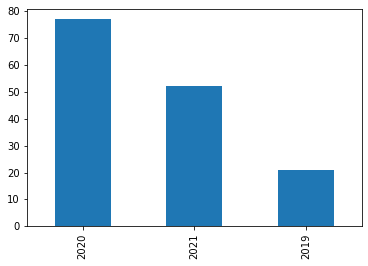

In [61]:
coffee['Harvest Year'].value_counts().plot(kind='bar')

<a class="anchor" id="cleaning_processing"></a>

### 6.2 Cleaning Processing Method Column

In [62]:
#check entries for Processing Method. Nothing to clean here.
coffee['Processing Method'].unique()

array(['Natural / Dry', 'Washed / Wet', 'Other', 'Pulped natural / honey'],
      dtype=object)

<AxesSubplot:>

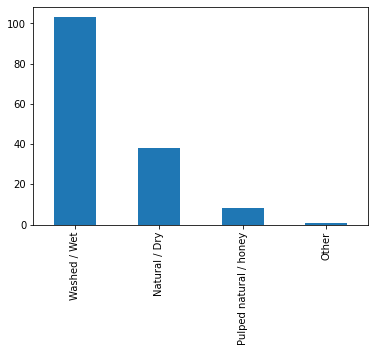

In [63]:
coffee['Processing Method'].value_counts().plot(kind='bar')

<a class="anchor" id="cleaning_color"></a>

### 6.3 Cleaning Color Column

In [64]:
coffee.Color.unique()

array(['None', 'Green', 'greenish', 'Yellow Green', 'Blue-Green',
       'Bluish-Green', 'Greenish', 'yellow-green'], dtype=object)

In [65]:
#consolodate color categories to Green, Blue-Green, Yellow-Green, or Greenish

coffee['Color'] = coffee['Color'].str.replace('Bluish-Green', 'Blue-Green')
coffee['Color'] = coffee['Color'].str.replace('yellow-green', 'Yellow-Green')
coffee['Color'] = coffee['Color'].str.replace('Yellow Green', 'Yellow-Green')
coffee['Color'] = coffee['Color'].str.replace('greenish', 'Green')


In [66]:
coffee.Color.unique()

array(['None', 'Green', 'Yellow-Green', 'Blue-Green', 'Greenish'],
      dtype=object)

<AxesSubplot:>

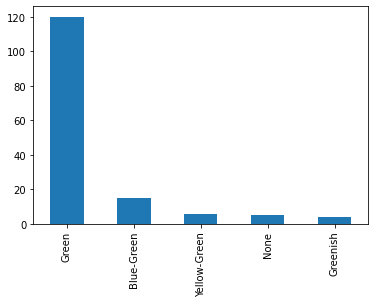

In [67]:
coffee['Color'].value_counts().plot(kind='bar')

<a class="anchor" id="cleaning_variety"></a>

### 6.4 Cleaning Variety Column

In [68]:
coffee.Variety.unique()

array(['Gesha', 'SL28', 'Typica', 'Ethiopian Heirlooms', 'Other',
       'Ethiopian Yirgacheffe', 'Catimor', 'Bourbon', 'Caturra', 'SHG',
       'Pacamara', 'Orange Bourbon', 'Yellow Bourbon', 'Catuai',
       'Mundo Novo', 'Java', 'Mandheling'], dtype=object)

<AxesSubplot:>

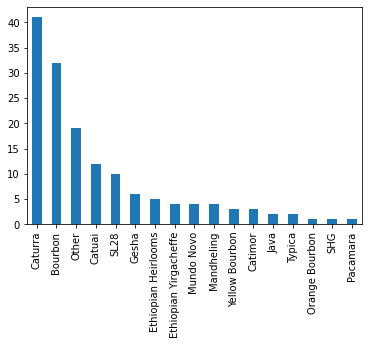

In [69]:
coffee['Variety'].value_counts().plot(kind='bar')

In [70]:
coffee['Variety'].value_counts()

Caturra                  41
Bourbon                  32
Other                    19
Catuai                   12
SL28                     10
Gesha                     6
Ethiopian Heirlooms       5
Ethiopian Yirgacheffe     4
Mundo Novo                4
Mandheling                4
Yellow Bourbon            3
Catimor                   3
Java                      2
Typica                    2
Orange Bourbon            1
SHG                       1
Pacamara                  1
Name: Variety, dtype: int64

No cleaning necessary for Variety column. I notice that we have many varieties with very few coffee data, so we will probably end up combining these with the 'Other' column in Feature Engineering.

<a class="anchor" id="cleaning_country"></a>

### 6.5 Cleaning Country of Origin Column

In [71]:
coffee['Country of Origin'].unique()

array(['Taiwan', 'Kenya', 'Colombia', 'Ethiopia', 'Vietnam',
       'Tanzania, United Republic Of', 'Guatemala', 'Nicaragua', 'Brazil',
       'Honduras', 'Burundi', 'Uganda', 'El Salvador', 'Rwanda',
       'Costa Rica', 'Peru', 'Thailand', 'Indonesia', 'Mexico', 'Ecuador'],
      dtype=object)

<AxesSubplot:>

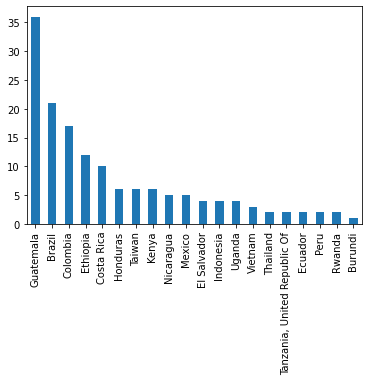

In [72]:
coffee['Country of Origin'].value_counts().plot(kind='bar')

Similar to the variety column, no cleaning necessary for Country of Orgin column but this column will probably go through some feature engineering to combine some of our less common countries into an Other category.

<a class="anchor" id="data_organization"></a>

## 7. Data Organizing- creating new, cleaned data frame

In [73]:
coffee2 = coffee[['Country of Origin','Variety', 'Mean Altitude (m)','Harvest Year','Processing Method', 'Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean Cup','Sweetness','Overall','Total Cup Points','Moisture','Color','Quakers', 'Total_Defects','Coffee_Grade']]

In [74]:
coffee2.head()

,Country of Origin,Variety,Mean Altitude (m),Harvest Year,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture,Color,Quakers,Total_Defects,Coffee_Grade
0,Taiwan,Gesha,1200.0,2020,Natural / Dry,8.58,8.67,8.17,8.25,8.50,...,10.0,10.0,10.0,8.50,89.25,11.0,None,0,0,Specialty
1,Kenya,SL28,1650.0,2019,Washed / Wet,8.33,8.50,8.25,8.67,8.42,...,10.0,10.0,10.0,8.58,89.17,11.0,Green,0,1,Specialty
2,Colombia,Typica,1800.0,2021,Washed / Wet,8.17,8.33,8.25,8.25,8.17,...,10.0,10.0,10.0,8.83,88.17,11.0,Green,0,0,Specialty
3,Ethiopia,Ethiopian Heirlooms,2219.0,2020,Other,8.25,8.25,7.92,8.42,7.92,...,10.0,10.0,10.0,8.33,87.17,11.0,Green,3,4,Premium
4,Colombia,Other,1650.0,2019,Pulped natural / honey,8.33,8.08,7.75,8.33,8.17,...,10.0,10.0,10.0,8.25,87.08,11.0,None,0,0,Specialty


In [75]:
#check our new dataframe to make sure we have no NaN values and that the dtypes look good:
coffee2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country of Origin  150 non-null    object 
 1   Variety            150 non-null    object 
 2   Mean Altitude (m)  150 non-null    float64
 3   Harvest Year       150 non-null    object 
 4   Processing Method  150 non-null    object 
 5   Aroma              150 non-null    float64
 6   Flavor             150 non-null    float64
 7   Aftertaste         150 non-null    float64
 8   Acidity            150 non-null    float64
 9   Body               150 non-null    float64
 10  Balance            150 non-null    float64
 11  Uniformity         150 non-null    float64
 12  Clean Cup          150 non-null    float64
 13  Sweetness          150 non-null    float64
 14  Overall            150 non-null    float64
 15  Total Cup Points   150 non-null    float64
 16  Moisture           150 non

<a class="anchor" id="saving"></a>
## 8. Saving Data

In [77]:
coffee2.to_csv('./data/coffee2.csv')